### Data Wrangling

* __Data wrangling__ is the process of converting data from the initial format to a format that may be better for analysis.

#### Import Pandas

You are running the lab in your browser, so we will install the libraries using piplite.

__import piplite__

__await piplite.install(['pandas'])__

__await piplite.install(['matplotlib'])__

Install specific version of libraries used in lab:

!mamba install pandas==1.3.3

!mamba install numpy=1.21.2

In [1]:
import pandas as pd
import matplotlib.pylab as plt

#### Reading the dataset from the URL and adding the related headers

First, we assign the URL of the dataset to "filename".

In [2]:
filename="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

In [3]:
# We create a Python list headers containing name of headers.

headers= ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

Use the Pandas method __read_csv()__ to load the data from the web address. Set the parameter "names" equal to the Python list "headers".

In [4]:
df=pd.read_csv(filename, names=headers)

Use the method __head()__ to display the first five rows of the dataframe.

In [5]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


So, how do we identify all those missing values and deal with them?

#### How to work with missing data?

Steps for working with missing data:

1.Identify missing data

2.Deal with missing data

3.Correct data format

### Identify and handle missing values

#### Identify missing values

#### Convert "?" to NaN

In the car dataset, missing data comes with the question mark "?". We replace "?" with __NaN (Not a Number),__ Python's default missing value marker for reasons of computational speed and convenience. Here we use the function:

.replace(A, B, inplace = True) 

to replace A by B.

In [6]:
import numpy as np

#replace "?" to NaN

df.replace("?", np.NaN, inplace=True)

In [7]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### Evaluating for Missing Data

The missing values are converted by default. We use the following functions to identify these missing values. There are two methods to detect missing data:

1. **.isnull()**
2. **.notnull()**

The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.

In [8]:
missing_data=df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


__"True"__ means the value is a missing value while __"False"__ means the value is not a missing value.

#### Count missing values in each column

Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value and "False" means the value is present in the dataset. In the body of the for loop the method __".value_counts()"__ counts the number of "True" values.

In [9]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

Based on the summary above, each column has 205 rows of data and seven of the columns containing missing data:

1. "normalized-losses": 41 missing data
2. "num-of-doors": 2 missing data
3. "bore": 4 missing data
4. "stroke" : 4 missing data
5. "horsepower": 2 missing data
6. "peak-rpm": 2 missing data
7. "price": 4 missing data

In [10]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [11]:
save_Data=df.to_csv("Wrangling1.csv", index= False)

### Deal with missing data

#### How to deal with missing data?

##### 1. Drop data

    a. Drop the whole row

    b. Drop the whole column

##### 2. Replace data

    a. Replace it by mean

    b. Replace it by frequency

    c. Replace it based on other functions

Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely. We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

#### Replace by mean:

* "normalized-losses": 41 missing data, replace them with mean
* "stroke": 4 missing data, replace them with mean
* "bore": 4 missing data, replace them with mean
* "horsepower": 2 missing data, replace them with mean
* "peak-rpm": 2 missing data, replace them with mean

* Replace by frequency:

    * "num-of-doors": 2 missing data, replace them with "four".
         * Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur

#### Drop the whole row:

* "price": 4 missing data, simply delete the whole row

 * Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us

#### Calculate the mean value for the "normalized-losses" column

In [12]:
avg_norm_loss= df["normalized-losses"].astype("float").mean(axis=0)
print("Average Normalized Losses : ",avg_norm_loss)                                              

Average Normalized Losses :  122.0


#### Replace "NaN" with mean value in "normalized-losses" column

In [13]:
df["normalized-losses"].replace(np.NaN, avg_norm_loss, inplace=True)

#### Calculate the mean value for the "bore" column

In [14]:
avg_bore=df["bore"].astype("float").mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810957


#### Replace "NaN" with the mean value in the "bore" column

In [15]:
df["bore"].replace(np.NaN, avg_bore, inplace=True)

#### Calculate the mean value for the "Stoke" column

In [16]:
avg_stoke=df["stroke"].astype("float").mean(axis=0)
print("Average of Stoke :", avg_stoke)

Average of Stoke : 3.2554228855721337


#### Replace NaN in "stroke" column with the mean value.

In [17]:
df["stroke"].replace(np.NaN, avg_stoke, inplace=True)

#### Calculate the mean value for the "horsepower" column

In [18]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

Average horsepower: 104.25615763546799


#### Replace "NaN" with the mean value in the "horsepower" column

In [19]:
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

#### Calculate the mean value for "peak-rpm" column

In [20]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

Average peak rpm: 5125.369458128079


#### Replace "NaN" with the mean value in the "peak-rpm" column

In [21]:
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

To see which values are present in a particular column, we can use the ".value_counts()" method:

In [22]:
df["num-of-doors"].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

We can see that four doors are the most common type. We can also use the ".idxmax()" method to calculate the most common type automatically:

In [23]:
df["num-of-doors"].value_counts().idxmax()

'four'

In [24]:
df["num-of-doors"].value_counts().idxmin()

'two'

The replacement procedure is very similar to what we have seen previously:

In [25]:
#replace the missing 'num-of-doors' values by the most frequent 

df["num-of-doors"].replace(np.NaN, "four", inplace=True)

Finally, let's drop all rows that do not have price data:

In [26]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [27]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [28]:
df.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


__Good!__ Now, we have a dataset with no missing values.

In [29]:
df.to_csv("Data Wrangling2.csv", index=False)

#### Correct data format

##### We are almost there!

The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).

In Pandas, we use:

__.dtype()__ to check the data type

__.astype()__ to change the data type

#### Let's list the data types for each column

In [30]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

As we can see above, some columns are not of the correct data type. Numerical variables should have type __'float' or 'int',__ and variables with strings such as categories should have type __'object'. For example, 'bore' and 'stroke'__ variables are numerical values that describe the engines, so we should expect them to be of the type __'float' or 'int'__; however, they are shown as type 'object'. We have to convert data types into a proper format for each column using the __"astype()"__ method.

#### Convert data types to proper format

In [31]:
df[["bore", "stroke"]]=df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

#### Let us list the columns after the conversion

In [32]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

___Wonderful!___

Now we have finally obtained the cleaned dataset with no missing values with all data in its proper format.

#### Data Standardization

Data is usually collected from different agencies in different formats. (Data standardization is also a term for a particular type of data normalization where we subtract the mean and divide by the standard deviation.)

__What is standardization?__

Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.

__Example__

___Transform mpg to L/100km:___

In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accepts the fuel consumption with L/100km standard.

We will need to apply __data transformation__ to transform __mpg__ into __L/100km.__

The formula for unit conversion is:

__L/100km = 235 / mpg__

We can do many mathematical operations directly in Pandas.

In [33]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [34]:
df.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400.0,23,28,16845.0
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300.0,19,25,19045.0
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500.0,18,23,21485.0
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800.0,26,27,22470.0
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400.0,19,25,22625.0


In [35]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


### According to the example above, transform mpg to L/100km in the column of "highway-mpg" and change the name of column to "highway-L/100km".

In [36]:
df['highway-L/100km']=235/df['highway-mpg']

In [37]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818


In [38]:
# rename column name from "highway-mpg" to "highway-L/100km"
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)

In [39]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818


In [40]:
df.to_csv("Data Wrangling3.csv", index=False)

#### Data Normalization

__Why normalization?__

Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling the variable so the variable values range from 0 to 1.

__Example__

To demonstrate normalization, let's say we want to scale the columns "length", "width" and "height".

__Target:__ would like to normalize those variables so their value ranges from 0 to 1

__Approach:__ replace original value by (original value)/(maximum value)

In [41]:
# replace (original value) by (original value)/(maximum value)

df['length']=df['length']/df['length'].max()
df['width']=df['width']/df['width'].max()

#### According to the example above, normalize the column "height".

In [42]:
df['height']=df['height']/df['height'].max()

In [43]:
# show the scaled columns

df[['length', "width", 'height']].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


Here we can see we've normalized "length", "width" and "height" in the range of [0,1].

#### Binning

__Why binning?__
Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.

__Example:__

In our dataset, "horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis?

We will use the pandas method 'cut' to segment the 'horsepower' column into 3 bins.

__Example of Binning Data In Pandas__

Convert data to correct format:

In [44]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Let's plot the histogram of horsepower to see what the distribution of horsepower looks like.

In [45]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818


In [46]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

Text(0.5, 1.0, 'horsepower bin')

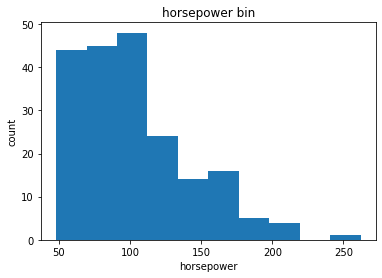

In [47]:
# set x/y labels and plot title
plt.pyplot.hist(df["horsepower"])
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bin")

We would like 3 bins of equal size bandwidth so we use numpy's linspace(start_value, end_value, numbers_generated function.

Since we want to include the minimum value of horsepower, we want to set start_value = min(df["horsepower"]).

Since we want to include the maximum value of horsepower, we want to set end_value = max(df["horsepower"]).

Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated = 4.

We build a bin array with a minimum value to a maximum value by using the bandwidth calculated above. The values will determine when one bin ends and another begins.

In [48]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

We set group names:

In [49]:
group_names = ['Low', 'Medium', 'High']

We apply the function "cut" to determine what each value of __df['horsepower']__ belongs to.

In [50]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )

In [51]:
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [52]:
df[['horsepower','horsepower-binned']].tail(20)

,horsepower,horsepower-binned
181,85,Low
182,85,Low
183,68,Low
184,100,Low
185,90,Low
186,90,Low
187,110,Low
188,68,Low
189,88,Low
190,114,Low


Let's see the number of vehicles in each bin:

In [53]:
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Let's plot the distribution of each bin:

Text(0.5, 1.0, 'horsepower bins')

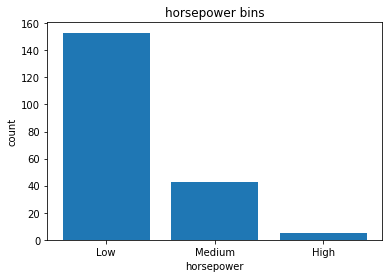

In [54]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Look at the dataframe above carefully. You will find that the last column provides the bins for "horsepower" based on 3 categories ("Low", "Medium" and "High").

We successfully narrowed down the intervals from 59 to 3!

__Bins Visualization__

Normally, a histogram is used to visualize the distribution of bins we created above.

Text(0.5, 1.0, 'horsepower bins')

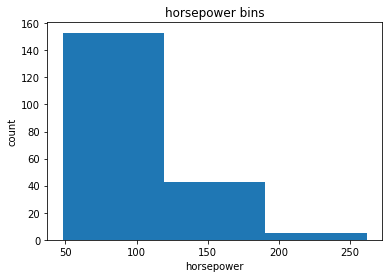

In [55]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

The plot above shows the binning result for the attribute "horsepower".

In [56]:
df.to_csv("Data Wrangling4.csv", index=False)

#### Indicator Variable (or Dummy Variable)

__What is an indicator variable?__

An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning.

__Why we use indicator variables?__

We use indicator variables so we can use categorical variables for regression analysis in the later modules.

__Example__

We see the column "fuel-type" has two unique values: "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" to indicator variables.

We will use pandas' method 'get_dummies' to assign numerical values to different categories of fuel type.

In [57]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-L/100km', 'highway-L/100km',
       'horsepower-binned'],
      dtype='object')

Get the indicator variables and assign it to data frame "dummy_variable_1":

In [58]:
dummy_variable_1=pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


Change the column names for clarity:

In [59]:
dummy_variable_1.rename(columns={'gas':"fuel-type-gas", 'diesel': "fuel-type-diesel"}, inplace=True)

In [60]:
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In the dataframe, column 'fuel-type' has values for 'gas' and 'diesel' as 0s and 1s now.

In [61]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

In [62]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111,5000.0,21,27,13495.0,11.190476,8.703704,Low,0,1
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111,5000.0,21,27,16500.0,11.190476,8.703704,Low,0,1
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,154,5000.0,19,26,16500.0,12.368421,9.038462,Medium,0,1
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,102,5500.0,24,30,13950.0,9.791667,7.833333,Low,0,1
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,115,5500.0,18,22,17450.0,13.055556,10.681818,Low,0,1


In [63]:
# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [64]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,13495.0,11.190476,8.703704,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,16500.0,11.190476,8.703704,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154,5000.0,19,26,16500.0,12.368421,9.038462,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102,5500.0,24,30,13950.0,9.791667,7.833333,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115,5500.0,18,22,17450.0,13.055556,10.681818,Low,0,1


The last two columns are now the indicator variable representation of the fuel-type variable. They're all 0s and 1s now.

__Similar to before, create an indicator variable for the column "aspiration"__

In [65]:
# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"

dummy_variable_2=pd.get_dummies(df['aspiration'])
dummy_variable_2.head()

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [66]:
# change column names for clarity

dummy_variable_2.rename(columns={'std':"aspiration-std", 'turbo':"aspiration-turbo"}, inplace=True)
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [67]:
df=pd.concat([df, dummy_variable_2], axis=1)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,city-mpg,highway-L/100km,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0


In [68]:
df.drop("aspiration", axis=1, inplace=True)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-L/100km,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0


Save the new csv:

In [69]:
df.to_csv("clean_df.csv")